In [6]:
#pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker  


In [7]:
#carregamento da base
dados = pd.read_csv("data/dados.csv", encoding="ISO-8859-1" )
dados.head()

,ID,Nome do Curso,Quantidade de Vendas,Preço Unitário,Data
0,1,Introdução à Programação em Python,50,39.9,2023-01-01
1,2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02
2,3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03
3,4,Introdução ao Machine Learning,15,99.9,2023-01-04
4,5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05


In [8]:
#visualização das principais características da base de dados
dados.info()
dados.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    25 non-null     int64  
 1   Nome do Curso         25 non-null     object 
 2   Quantidade de Vendas  25 non-null     int64  
 3   Preço Unitário        25 non-null     float64
 4   Data                  25 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ KB


,ID,Quantidade de Vendas,Preço Unitário
count,25.000000,25.000000,25.000000
mean,13.000000,17.960000,83.900000
std,7.359801,10.921996,21.984843
min,1.000000,5.000000,39.900000
25%,7.000000,10.000000,69.900000
50%,13.000000,15.000000,79.900000
75%,19.000000,20.000000,99.900000
max,25.000000,50.000000,119.900000


In [9]:
#Criando uma nova coluna com os valor da receita por dia
dados['receita_dia'] = dados['Preço Unitário']*dados['Quantidade de Vendas']

#usando o metodo sum da biblioteca pandas para somar a receita total
receita_total = dados['receita_dia'].sum()
print(f"Receita total R$ {receita_total:.2f}")

Receita total R$ 32735.10


## CURSO COM O MAIOR NÚMERO DE VENDAS

C:\Users\ana.kindinger\AppData\Local\Temp\ipykernel_9268\3528694438.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graf = sns.barplot(x = 'Quantidade de Vendas', y = 'Nome do Curso', data = somas_ordenadas, palette='viridis')


Text(0.5, 1.0, 'Quantidade de Vendas por Curso')

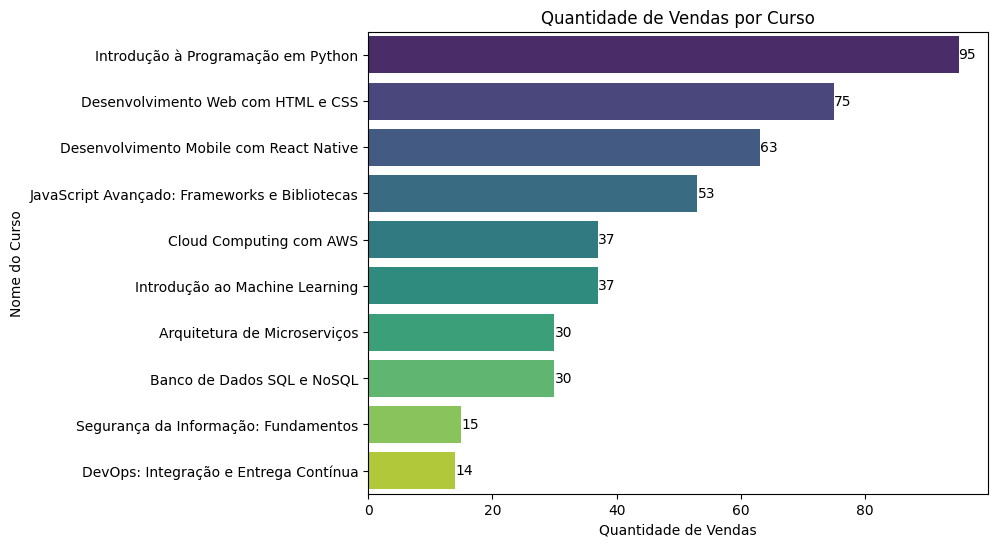

In [10]:
# Fazendo o agrupamento dos cursos para somar suas vendas
somas = dados.groupby('Nome do Curso').agg({'Quantidade de Vendas':'sum'}).round(0).reset_index()
somas_ordenadas = somas.sort_values(by='Quantidade de Vendas', ascending=False)

#configurações e plotagem do gráfico
plt.figure(figsize=(8, 6))
graf = sns.barplot(x = 'Quantidade de Vendas', y = 'Nome do Curso', data = somas_ordenadas, palette='viridis')

#labels e titulo
for i in graf.containers:
    graf.bar_label(i, fmt='%.0f', label_type='edge')
plt.title("Quantidade de Vendas por Curso")

Gráfico elaborado considerando que os cursos com o mesmo nome são iguais e desconsiderando o Id único, uma vez que os dados de nome e preço são iguais.

## GRÁFICO DE VENDAS AO LONGO DO TEMPO

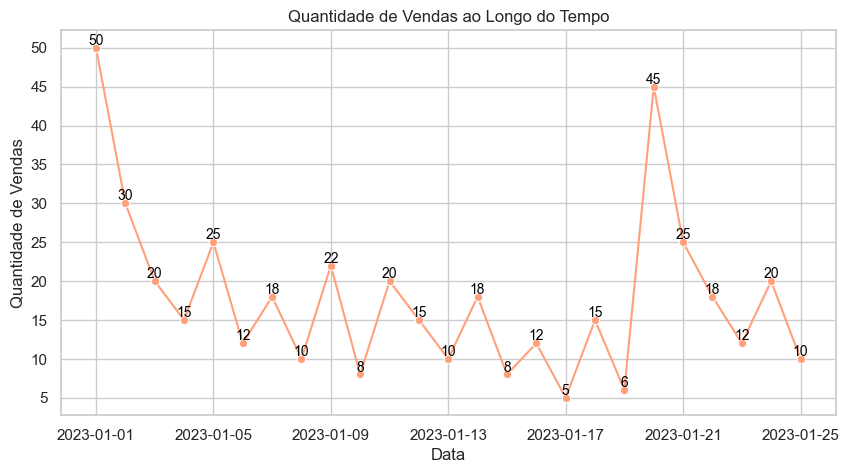

In [11]:
# Convertendo a coluna de datas para o tipo datetime
dados['Data'] = pd.to_datetime(dados['Data'])

# Configuração do estilo do gráfico
sns.set_theme(style="whitegrid")

# Plotando o gráfico de linha usando seaborn
plt.figure(figsize=(10,5))
graf = sns.lineplot(x='Data', y='Quantidade de Vendas', data=dados, marker = "o", color="lightsalmon")
for x, y in zip(dados['Data'], dados['Quantidade de Vendas']):
    plt.text(x=x, y=y, s=f'{y}', ha='center', va='bottom', fontsize=10, color='black')

# Adicionando título e labels
plt.title('Quantidade de Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
graf.yaxis.set_major_locator(ticker.MultipleLocator(5))


## Grafico da correlação entre preço e numero de vendas

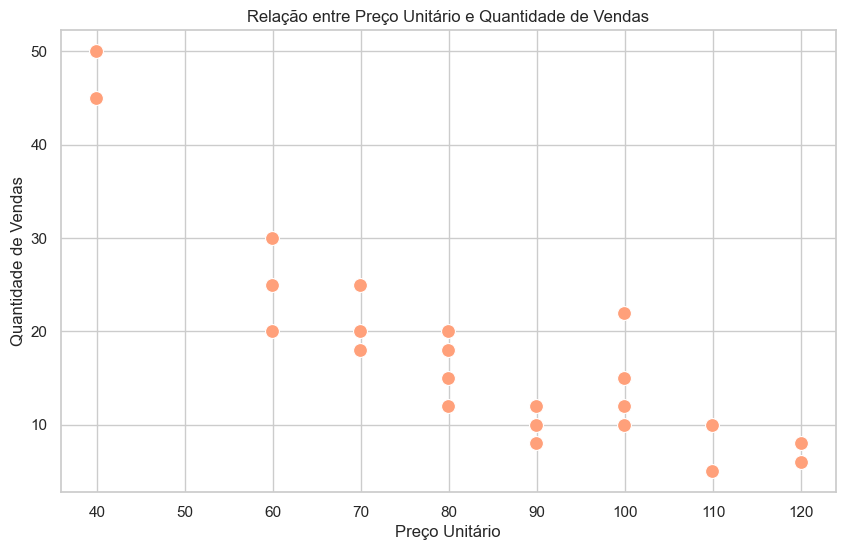

In [12]:
# Plotando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Preço Unitário', y='Quantidade de Vendas', data=dados, color='lightsalmon', s=100)

# Adicionando título e labels
plt.title('Relação entre Preço Unitário e Quantidade de Vendas')
plt.xlabel('Preço Unitário')
plt.ylabel('Quantidade de Vendas')

# Exibindo o gráficov
plt.show()

É possivel observar uma correlação negativa, ou seja, quanto maior o preço menor o número de vendas.